In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
root_dir = "/home/sms/vws/frappe/new_data"

x_test = np.fromfile(root_dir + "/x_test.bin", dtype = np.float32)
y_test_orig = np.fromfile(root_dir + "/y_test.bin", dtype = np.float32)
y_test_hat_orig = np.fromfile(root_dir + "/y_test_hat.bin", dtype = np.float32)

In [3]:
y_test = np.reshape(y_test_orig, (-1, 3))
y_test_hat = np.reshape(y_test_hat_orig, (-1, 3))

In [4]:
def RMSE(y, y_hat):
    return np.mean(np.power((y-y_hat), 2))

0.005892787


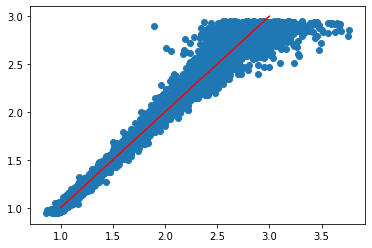

In [10]:
y = y_test[:, 0]
y_hat = y_test_hat[:, 0]

plt.scatter(y_hat,y)
plt.plot(np.linspace(1,3), np.linspace(1,3), 'r')

print(RMSE(y, y_hat))

1.8856758e-06


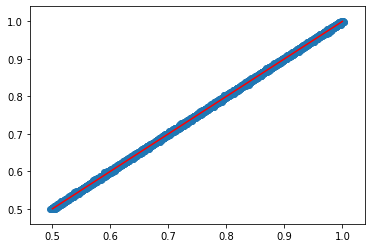

In [11]:
y = y_test[:, 1]
y_hat = y_test_hat[:, 1]

plt.scatter(y_hat,y)
plt.plot(np.linspace(0.5,1), np.linspace(0.5,1), 'r')

print(RMSE(y, y_hat))

0.0016538745


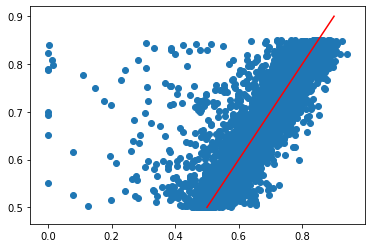

In [12]:
y = y_test[:, 2]
y_hat = y_test_hat[:, 2]

plt.scatter(y_hat,y)
plt.plot(np.linspace(0.5,0.9), np.linspace(0.5,0.9), 'r')

print(RMSE(y, y_hat))

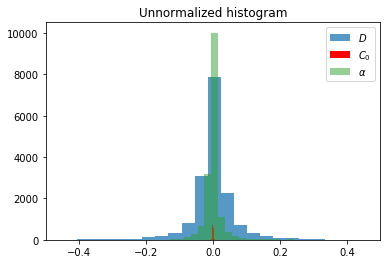

In [17]:
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

#plt.grid(True)
plt.hist(y_test[:, 0]-y_test_hat[:, 0], 50, alpha=0.75)
plt.hist(y_test[:, 1]-y_test_hat[:, 1], 50, alpha=1, facecolor='r')
plt.hist(y_test[:, 2]-y_test_hat[:, 2], 50, alpha=0.5)
plt.legend([r"$D$", r"$C_0$", r"$\alpha$"])
plt.title("Unnormalized histogram")
plt.xlim([-0.5, 0.5])
plt.show()


In [20]:
model = torch.load("saved/20190905-1230.pt").to("cpu")
model.eval()

CNN1D(
  (conv1): Conv1d(1, 64, kernel_size=(2,), stride=(1,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(64, 128, kernel_size=(2,), stride=(1,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool1d(kernel_size=64, stride=64, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=128, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=3, bias=True)
)

In [21]:
x = torch.from_numpy(np.reshape(x_test, (y_test.shape[0], 1, -1)))

x.shape

torch.Size([16384, 1, 110])

In [22]:
y_hat_nn = model(x)
y_hat_nn = y_hat_nn.detach().numpy()
y_hat_nn.shape

(16384, 3)

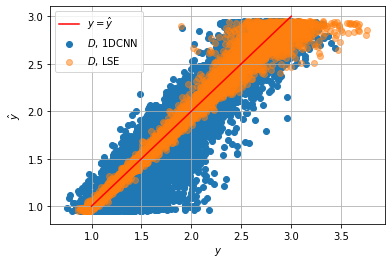

0.005892787
0.038701203


In [40]:
y = y_test[:, 0]
y_hat = y_test_hat[:, 0]
y_nn  = y_hat_nn[:, 0]

plt.scatter(y_nn, y, alpha=1)
plt.scatter(y_hat,y, alpha=0.5)
plt.plot(np.linspace(1,3), np.linspace(1,3), 'r')
plt.grid(True)
plt.xlabel(r"$y$")
plt.ylabel(r"$\hat{y}$")
plt.legend([r"$y=\hat{y}$", r"$D$, 1DCNN", r"$D$, LSE"])
plt.show()
print(RMSE(y, y_hat))
print(RMSE(y, y_nn))

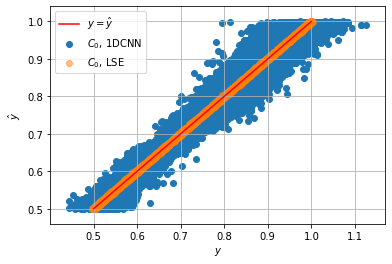

1.8856758e-06
0.0008362711


In [41]:
y = y_test[:, 1]
y_hat = y_test_hat[:, 1]
y_nn  = y_hat_nn[:, 1]

plt.scatter(y_nn, y, alpha=1)
plt.scatter(y_hat,y, alpha=0.5)
plt.plot(np.linspace(0.5,1), np.linspace(0.5,1), 'r')
plt.grid(True)
plt.xlabel(r"$y$")
plt.ylabel(r"$\hat{y}$")
plt.legend([r"$y=\hat{y}$", r"$C_0$, 1DCNN", r"$C_0$, LSE"])
plt.show()

print(RMSE(y, y_hat))
print(RMSE(y, y_nn))

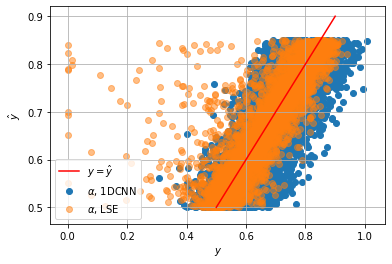

0.0016538745
0.003309695


In [44]:
y = y_test[:, 2]
y_hat = y_test_hat[:, 2]
y_nn  = y_hat_nn[:, 2]

plt.scatter(y_nn, y, alpha=1)
plt.scatter(y_hat,y, alpha=0.5)
plt.plot(np.linspace(0.5,0.9), np.linspace(0.5,0.9), 'r')
plt.grid(True)
plt.xlabel(r"$y$")
plt.ylabel(r"$\hat{y}$")
plt.legend([r"$y=\hat{y}$", r"$\alpha$, 1DCNN", r"$\alpha$, LSE"])
plt.show()
print(RMSE(y, y_hat))
print(RMSE(y, y_nn))

In [26]:
(RMSE(y_test[:, 0], y_hat_nn[:, 0])+RMSE(y_test[:, 1], y_hat_nn[:, 1])+RMSE(y_test[:, 2], y_hat_nn[:, 2]))/3

0.014282390475273132

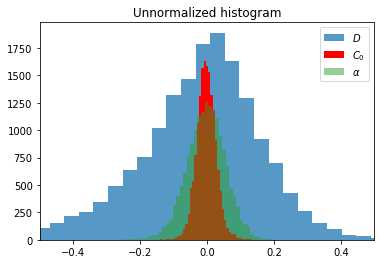

In [42]:
plt.hist(y_test[:, 0]-y_hat_nn[:, 0], 50, alpha=0.75)
plt.hist(y_test[:, 1]-y_hat_nn[:, 1], 50, alpha=1, facecolor='r')
plt.hist(y_test[:, 2]-y_hat_nn[:, 2], 50, alpha=0.5)
plt.legend([r"$D$", r"$C_0$", r"$\alpha$"])
plt.title("Unnormalized histogram")
plt.xlim([-0.5, 0.5])
plt.show()

In [19]:
(RMSE(y_test[:, 0], y_test_hat[:, 0])+RMSE(y_test[:, 1], y_test_hat[:, 1])+RMSE(y_test[:, 2], y_test_hat[:, 2]))/3

0.002516182449956735